# Описание проекта #

Рынок заведений общественного питания в Москве

Мы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами мы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможем ли мы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?
Мы — гуру аналитики, и партнёры просят вас подготовить исследование рынка. У нас есть открытые данные о заведениях общественного питания в Москве.

Таблица rest:

- id — идентификатор объекта;
- object_name — название объекта общественного питания;
- chain — сетевой ресторан;
- object_type — тип объекта общественного питания;
- address — адрес;
- number — количество посадочных мест.

# Предпросмотр таблицы #

- импортируем библиотеки
- посмотрим информацию о таблице

In [77]:
# сначала импортируем библиотеки

import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import datetime as dt
import scipy.stats as stats
import plotly.express as px

In [78]:
# объявим переменную с таблицей
# посмотрим информацию о таблице 

rest = pd.read_csv('/rest_data.csv')
display(rest.head())
rest.info()
rest.describe()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


,id,number
count,15366.000000,15366.000000
mean,119720.066901,59.547182
std,73036.130732,74.736833
min,838.000000,0.000000
25%,28524.000000,12.000000
50%,144974.500000,40.000000
75%,184262.250000,80.000000
max,223439.000000,1700.000000


# Подготовка данных #

- приведем все строки к нижнему регистру
- приведем данные к нужным типам
- проверим данные на дубликаты

Названия столбцов корректные. Пропущенных значений не было. Проверим данные на дубликаты.

In [79]:
rest['object_name'] = rest['object_name'].str.lower()
rest['object_type'] = rest['object_type'].str.lower()
rest['address'] = rest['address'].str.lower()

In [80]:
rest.duplicated(subset=['object_name', 'address', 'chain', 'object_type', 'number']).sum()

85

In [81]:
rest.drop_duplicates(subset=['object_name', 'address', 'chain', 'object_type', 'number'], inplace = True)
rest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15281 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15281 non-null  int64 
 1   object_name  15281 non-null  object
 2   chain        15281 non-null  object
 3   object_type  15281 non-null  object
 4   address      15281 non-null  object
 5   number       15281 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 835.7+ KB


## Вывод ##

Пустых значений нет и дубликатов больше нет! Типы данных в столбцах корректны. Эти новости не могут не радовать.

In [82]:
rest.describe()

,id,number
count,15281.000000,15281.000000
mean,119500.243440,59.788234
std,73044.123929,74.843042
min,838.000000,0.000000
25%,28493.000000,14.000000
50%,144799.000000,40.000000
75%,184090.000000,80.000000
max,223439.000000,1700.000000


Мы привели названия заведений к строчному шрифту и удалили дубликаты, поэтому явных повторов быть не может. Вариант, что где-то в названии была допущена ошибка, допустим, однако таких случаев должно быть немного, и погрешность не окажет влияния на весь анализ.

In [83]:
rest.query('number > 1000')

,id,object_name,chain,object_type,address,number
2313,26560,ресторан «альфа»,нет,ресторан,"город москва, измайловское шоссе, дом 71, корп...",1040
3686,27026,рум сервис,нет,ресторан,"город москва, площадь европы, дом 2",1200
4480,27024,рум сервис,нет,ресторан,"город москва, кутузовский проспект, дом 2/1, с...",1200
8148,80291,банкетный зал шелк,нет,ресторан,"город москва, большой саввинский переулок, дом...",1500
8345,27750,столовая-буфет,нет,столовая,"город москва, улица волхонка, дом 15",1400
9064,19719,комбинат питания «управление академсервис»,нет,столовая,"город москва, проспект вернадского, дом 84, ст...",1288
12723,199696,arena by soho family,нет,бар,"город москва, кутузовский проспект, дом 36, ст...",1700


Некоторые числа ошеломляют, однако клуб "Сохо" рассчитан на прием 4000 гостей! Данные вполне реальны, аномальных значений не наблюдается.

Заведения, где нет посадочных мест - рабтают на вынос, все логично.

Я предполагаю, что в столбце id могут быть указаны идентификаторы, присвоенные при открытии заведения. Кто-то уходит с рынка, кто-то задеживается там надолго, постоянно обновлять данные невозможно.

# Анализ данных #

- исследуем соотношение видов объектов общественного питания по количеству;
- исследуем соотношение сетевых и несетевых заведений по количеству;
- посмотрим, для какого вида объекта общественного питания характерно сетевое распространение;
- посмотрим, что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест;
- для каждого вида объекта общественного питания опишем среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест;
- выделим в отдельный столбец информацию об улице из столбца address;
- построим график топ-10 улиц по количеству объектов общественного питания;
- найдем число улиц с одним объектом общественного питания;
- посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания;
- сделаем общий вывод и дадим рекомендации о виде заведения, количестве посадочных мест, а также районе расположения.


## график соотношения видов объектов общественного питания по количеству ##

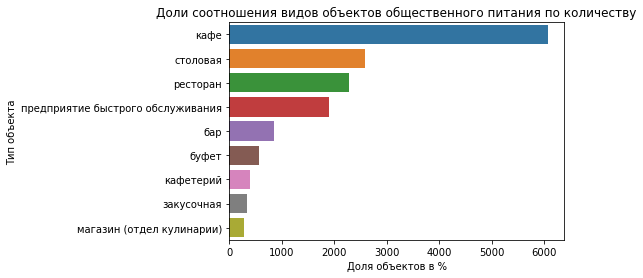

In [84]:
# построим график соотношения видов объектов общественного питания по количеству

temp = rest.pivot_table(index='object_type', values='id', aggfunc='count').reset_index()

ax = sns.barplot(x='id', y='object_type', data=temp.sort_values(by='id', ascending=False))
ax.set_title('Доли соотношения видов объектов общественного питания по количеству')
ax.set_xlabel('Доля объектов в %')
ax.set_ylabel('Тип объекта')
plt.show()

Первое место занимают кафе, далее идут столовые, рестораны и фаст-фуды, остальные виды объектов явно уступают.

## график соотношения сетевых и несетевых заведений по количеству ##

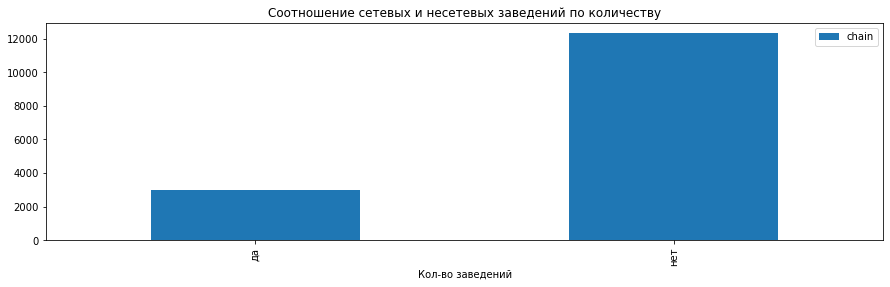

In [85]:
# построим график соотношения сетевых и несетевых заведений по количеству

rest.groupby('chain').agg({'chain': 'count'}).plot(kind='bar', figsize=(15,4))

plt.title('Соотношение сетевых и несетевых заведений по количеству')
plt.xlabel('Кол-во заведений')
plt.show()

По нашим данным сетевых заведений почти в 4 раза меньше чем несетевых.

## график сетевого распространения заведений ##

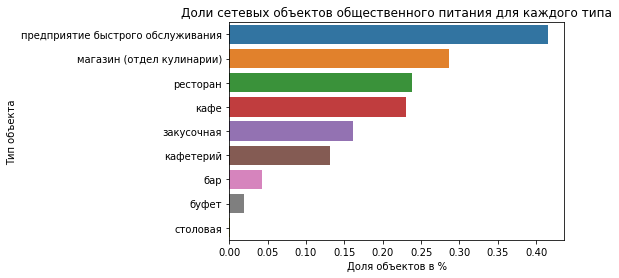

In [86]:
# посмотрим для какого вида объекта общественного питания характерно сетевое распространение
temp = rest.pivot_table(index='object_type', values='id', columns='chain', aggfunc='count').reset_index()
temp['percent'] = temp['да'] / (temp['да'] + temp['нет'])

ax = sns.barplot(x='percent', y='object_type', data=temp.sort_values(by='percent', ascending=False))
ax.set_title('Доли сетевых объектов общественного питания для каждого типа')
ax.set_xlabel('Доля объектов в %')
ax.set_ylabel('Тип объекта')
plt.show()

Среди сетевых заведений на первом месте идут фаст-фуды, кулинарии, рестораны и кафе. Сетевых столовых в соотношении с остальным заведениями почти нет.

## соотношение мест к количеству сетевых заведений ##

In [87]:
# посмотрим, что характерно для сетевых заведений: много заведений с небольшим числом

temp = rest.query('chain == "да"').groupby('object_type').agg({'id': 'count', 'number' : 'mean'}).sort_values(by = 'id', 
                                                                                                      ascending = False)
fig = px.scatter(temp, x="id", y="number",color="number", color_continuous_scale=px.colors.sequential.Viridis,
                 render_mode="webgl", width=600, height=600)
fig.show()

Как видим, сетевые заведения преимущественно имеют небольшое количество посадочных мест.

## среднее кол-во посадочных мест для каждого вида заведений ##

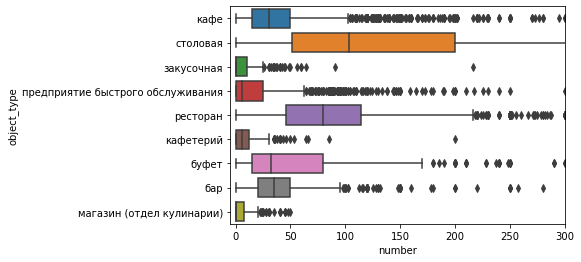

In [88]:
# для каждого вида объекта общественного питания опишем среднее количество посадочных мест
# обрежем количество посадочных мест 300 для более наглядного графика

ax = sns.boxplot(x='number', y='object_type', data=rest)
ax.set_xlim(-5,300)
plt.show()

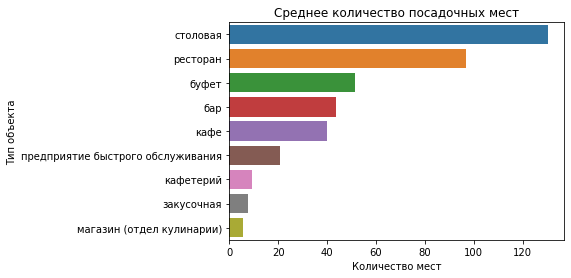

In [89]:
temp = rest.groupby('object_type').agg({'number' : 'mean'}).sort_values(by = 'number', ascending = False).reset_index()
ax = sns.barplot(x='number', y='object_type', data=temp)
ax.set_title('Среднее количество посадочных мест')
ax.set_xlabel('Количество мест')
ax.set_ylabel('Тип объекта')
plt.show()

Как и ожидалось, столовые и рестораны по посадочным местам идут на лидирующих позициях.

## статистика по улицам и районам ##

In [90]:
# подготовим данные для выделения улицы

symbols = [',', '«', '»', '(', ')', '"', '  ']

for s in symbols:
    rest['address'] = rest['address'].str.replace(s, ' ')
rest['address'] = rest['address'].str.replace('ё','е')
address = rest['address'].to_list()
streets = []

for street in address:  
    start = street.find('город москва')
    end = street.find('дом ')
    streets.append(street[start+12:end-1])

rest['streetname'] = streets    
rest.head(10)    

C:\Users\Vlados\AppData\Local\Temp/ipykernel_5740/3078951368.py:6: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



,id,object_name,chain,object_type,address,number,streetname
0,151635,сметана,нет,кафе,город москва улица егора абакумова дом 9,48,улица егора абакумова
1,77874,родник,нет,кафе,город москва улица талалихина дом 2/1 корпус 1,35,улица талалихина
2,24309,кафе «академия»,нет,кафе,город москва абельмановская улица дом 6,95,абельмановская улица
3,21894,пиццетория,да,кафе,город москва абрамцевская улица дом 1,40,абрамцевская улица
4,119365,кафе «вишневая метель»,нет,кафе,город москва абрамцевская улица дом 9 корпус 1,50,абрамцевская улица
5,27429,стол. при гоу сош № 1051,нет,столовая,город москва абрамцевская улица дом 15 корпус 1,240,абрамцевская улица
6,148815,брусника,да,кафе,город москва переулок сивцев вражек дом 6/2,10,переулок сивцев вражек
7,20957,буфет мтуси,нет,столовая,город москва авиамоторная улица дом 8 строение 1,90,авиамоторная улица
8,20958,кпф семья-1,нет,столовая,город москва авиамоторная улица дом 8 строение 1,150,авиамоторная улица
9,28858,столовая мтуси,нет,столовая,город москва авиамоторная улица дом 8 строение 1,120,авиамоторная улица


In [91]:

temp = rest.groupby('streetname').count().sort_values(by='object_type', ascending=False).head(10).reset_index()
top_10 = list(temp['streetname'])
temp

,streetname,id,object_name,chain,object_type,address,number
0,проспект мира,203,203,203,203,203,203
1,профсоюзная улица,181,181,181,181,181,181
2,ленинградский проспект,169,169,169,169,169,169
3,пресненская набережная,167,167,167,167,167,167
4,варшавское шоссе,155,155,155,155,155,155
5,ленинский проспект,147,147,147,147,147,147
6,проспект вернадского,127,127,127,127,127,127
7,кутузовский проспект,114,114,114,114,114,114
8,каширское шоссе,103,103,103,103,103,103
9,ходынский бульвар,102,102,102,102,102,102


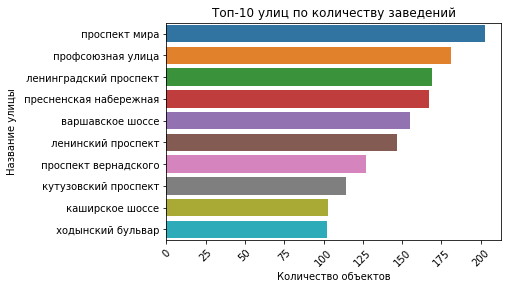

In [92]:
# строим график

ax = sns.barplot(x='id', y='streetname', data=temp)
ax.set_title('Топ-10 улиц по количеству заведений')
ax.set_xlabel('Количество объектов')
ax.set_ylabel('Название улицы')
plt.xticks(rotation=45)
plt.show()

In [93]:
# загрузим таблицу с районами

streets = pd.read_csv('mosgaz-streets.csv')
streets['streetname'] = streets['streetname'].str.lower()
streets.head()

,streetname,areaid,okrug,area
0,выставочный переулок,17,ЦАО,Пресненский район
1,улица гашека,17,ЦАО,Пресненский район
2,большая никитская улица,17,ЦАО,Пресненский район
3,глубокий переулок,17,ЦАО,Пресненский район
4,большой гнездниковский переулок,17,ЦАО,Пресненский район


In [94]:
# объединим таблицы, чтобы сопоставить улицы с районами

streets['streetname'] = streets['streetname'].str.lower()
temp['streetname'] = temp['streetname'].str.strip()

district = temp.merge(streets, on='streetname', how='left')
district = district.drop(['id','areaid', 'object_name', 'chain', 'object_type', 'address', 'number'],1)
district

C:\Users\Vlados\AppData\Local\Temp/ipykernel_5740/3956190576.py:7: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



,streetname,okrug,area
0,проспект мира,СВАО,Алексеевский район
1,проспект мира,СВАО,Ярославский Район
2,проспект мира,СВАО,Район Марьина роща
3,проспект мира,СВАО,Останкинский район
4,проспект мира,СВАО,Район Ростокино
5,проспект мира,СВАО,Район Свиблово
6,проспект мира,ЦАО,Мещанский район
7,профсоюзная улица,ЮЗАО,Академический район
8,профсоюзная улица,ЮЗАО,Район Черемушки
9,профсоюзная улица,ЮЗАО,Район Ясенево


Мы видим, что улицы располагаются во всевозможных районах Москвы.

## число улиц с одним заведением ##

In [95]:
# найдем число улиц с одним объектом общественного питания.

one = rest.groupby('streetname').agg({'object_name': 'count'}).sort_values(by = 'object_name', ascending = False)
one = one.query('object_name == 1')
one = one.reset_index()

Таких улиц 829. Добавим округ и посмотрим, сколько всего округов.

In [96]:
one['streetname'] = one['streetname'].str.strip()
one = one.merge(streets, on='streetname', how='left')
area_nunique = one['area'].drop_duplicates()
area_nunique = area_nunique.dropna()
display(area_nunique.reset_index())

,index,area
0,0,Район Марьина роща
1,1,Даниловский район
2,4,Рязанский район
3,5,Район Хамовники
4,8,Район Богородское
...,...,...
93,759,Район Восточный
94,779,Район Коньково
95,811,Район Марфино
96,815,Район Нагатино-Садовники


Всего районов, где есть хотя бы одна улица с одним заведением, - 98.

## распределение количества посадочных мест для улиц с большим количеством заведений ##

In [97]:
rest

,id,object_name,chain,object_type,address,number,streetname
0,151635,сметана,нет,кафе,город москва улица егора абакумова дом 9,48,улица егора абакумова
1,77874,родник,нет,кафе,город москва улица талалихина дом 2/1 корпус 1,35,улица талалихина
2,24309,кафе «академия»,нет,кафе,город москва абельмановская улица дом 6,95,абельмановская улица
3,21894,пиццетория,да,кафе,город москва абрамцевская улица дом 1,40,абрамцевская улица
4,119365,кафе «вишневая метель»,нет,кафе,город москва абрамцевская улица дом 9 корпус 1,50,абрамцевская улица
...,...,...,...,...,...,...,...
15361,208537,шоколадница,да,кафе,город москва 3-й крутицкий переулок дом 18,50,3-й крутицкий переулок
15362,209264,шоколадница,да,кафе,город москва улица земляной вал дом 33,10,улица земляной вал
15363,209186,шоколадница,да,кафе,город москва улица земляной вал дом 33,20,улица земляной вал
15364,221900,шоколадница,да,кафе,город москва поселение московский киевское шос...,36,поселение московский киевское шоссе 22-й кило...


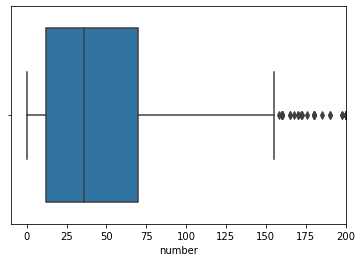

In [98]:
# посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания.
# Какие закономерности можно выявить?

temp = rest[rest['streetname'].isin(top_10)]
ax = sns.boxplot(x=temp['number'])
ax.set_xlim(-10,200)
plt.show()

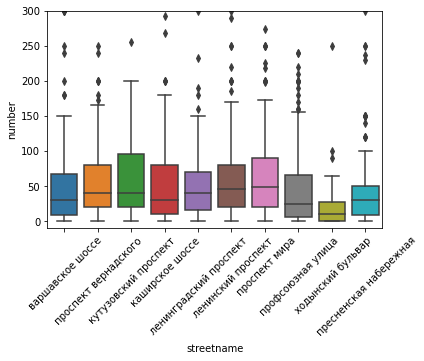

In [99]:
ax = sns.boxplot(x='streetname', y='number', data=temp)
plt.xticks(rotation=45)
ax.set_ylim(-10,300)
plt.show()

Мы можем следать следующий вывод: количество посадочных мест на самых популярных улицах небольшое. Можно предположить, что центр Москвы является очень дорогим местом для аренды или же люди просто привыкли гулять там и быстро перекусывать.

## Вывод ##

Подводя итоги, можно сделать следующие выводы:

- самыми популярными видами заведений являются: кафе (с большим отрывом), столовые и рестораны;
- несетевых заведений почти в 4 раза больше, чем сетевых;
- столовые, рестораны и бары являются лидерами по количеству посадочных мест;
- среди сетевых заведений лидером является кафе;
- есть улицы с большим колчеством объектов общественного питания и небольшим посадочных мест;
- больше всего заведений располагается на главных улицах города: Ленинградском проспекте, Просоюзной улице и проспекте Мира.

В качетсве рекомендаций я бы предложил обратить внимание на центральную часть города, где больше всего туристов и просто отдыхающих, в частности те улицы, где минимальное количество объектов общественного питания. Форматом заведения следует выбрать кафе с неболшим количеством посадочных мест.